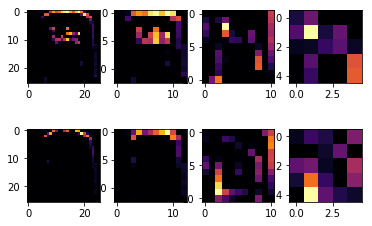

In [25]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2,4)
images = [1,10]
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    for (k, v) in enumerate(images):
        f1 = activation_model.predict(test_images[v].reshape(1, 28, 28, 1))[x]
        axarr[k,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
        axarr[k,x].grid(False)

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [36]:
import tensorflow as tf
print(tf.__version__)
class MyCallback(tf.keras.callbacks.Callback):
    def __init__(self, val):
        self.val = val 
        
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > self.val:
            self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

cb = MyCallback(0.5)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5, callbacks=[cb])
test_loss = model.evaluate(test_images, test_labels)

1.13.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 3, 3, 16)          2320      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 16)                0         
___